In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/mat.arruda/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [10]:
# Starting from the most recent data point in the database. 
# date_f = (most_recent_date['date'])
date_f = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
print(date_f)

2017-08-23 00:00:00


In [11]:
# Calculate the date one year from the last date in data set.
date_i = date_f - dt.timedelta(days = 366)
print(date_i)

2016-08-22 00:00:00


In [12]:
# Perform a query to retrieve the data and precipitation scores
preciptation = session.query(measurement.date, measurement.prcp).\
                            filter(measurement.date >= date_i).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
preciptation_df = pd.DataFrame(preciptation, columns = ['Date', 'Preciptation'])
preciptation_df['Preciptation'] = preciptation_df['Preciptation'].fillna(0)

In [13]:
# Sort the dataframe by date
preciptation_df = preciptation_df.sort_values(by=['Date'], ascending = True)
preciptation_df = preciptation_df.set_index(preciptation_df['Date'])
preciptation_df.head()

,Date,Preciptation
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


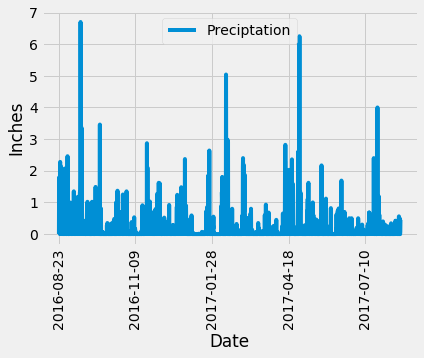

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
preciptation_df.plot()

plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)

plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
preciptation_df['Preciptation'].describe()

count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: Preciptation, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).scalar()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_count = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).order_by(desc(func.count(measurement.station))).\
            all()
stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Show the most active station
most_active = stations_count[0][0]
most_active

'USC00519281'

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest
# and average temperature.
most_active_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs),\
                func.avg(measurement.tobs)).filter(measurement.station == most_active).\
                filter(measurement.date >= date_i).all()

print(f'Lowest temperature: {most_active_stats[0][0]} °F.')
print(f'Highest temperature: {most_active_stats[0][1]} °F.')
print(f'Average temperature: {most_active_stats[0][2]} °F.')

Lowest temperature: 59.0 °F.
Highest temperature: 83.0 °F.
Average temperature: 73.10795454545455 °F.


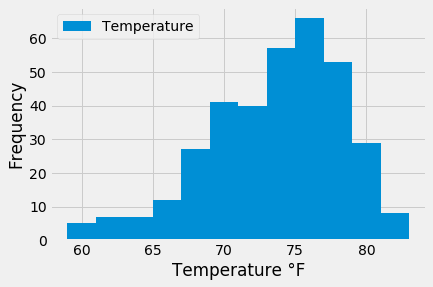

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temperature = session.query(measurement.tobs).filter(measurement.station == most_active).\
            filter(measurement.date >= date_i).all()

#Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature, columns=['Temperature'])

# Plot the results as a histogram
temperature_df.plot.hist(bins = 12)
plt.xlabel('Temperature °F')
plt.show()

# Close session

In [21]:
# Close Session
session.close()